#### CAR PRICE ANALYSIS

## ANJALI L

### OVERVIEW: 
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:



## OBJECTIVE:
* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car
* You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

### SOURCE:
Chines Automobile Company

### SOURCE:
Chines Automobile Company

### LIBRARY IMPORING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

### DATA COLLECTING

In [123]:
car_data=pd.read_csv("CarPrice_Assignment.csv")
print("CarPrice Data Loaded Successfully...")
car_data

CarPrice Data Loaded Successfully...


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### BASIC STATISTICS

In [125]:
print("BASIC STASTISTICS:")

BASIC STASTISTICS:


In [9]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
car_data.shape

(205, 26)

In [13]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
car_data.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [19]:
car_data.duplicated().sum()

0

### CAR DATA VISUALIZATION

<Axes: ylabel='price'>

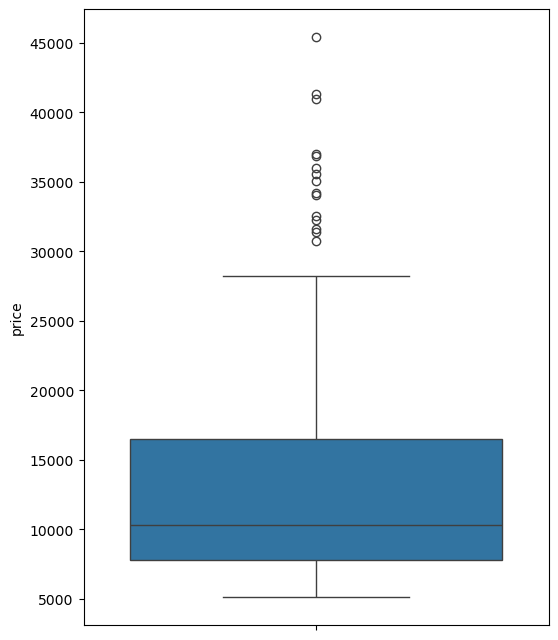

In [21]:
plt.figure(figsize=(6,8))
sns.boxplot(car_data['price'])

<Axes: xlabel='price', ylabel='Density'>

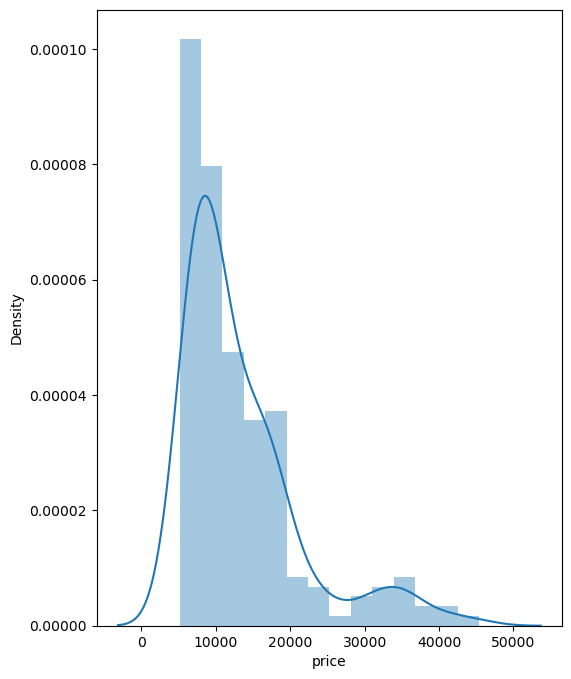

In [45]:
plt.figure(figsize=(6,8))
sns.distplot(car_data['price'])

### DATA CLEANING

In [39]:
print(len(car_data))

205


In [41]:
#OUTLINERS REMOVAL

upper_limit=car_data['price'].mean()+ 3*car_data['price'].std()
lower_limit=car_data['price'].mean()-3*car_data['price'].std()
print("UPPER LIMIT=",upper_limit)
print("LOWER LIMIT=",lower_limit)


UPPER LIMIT= 37243.267565961156
LOWER LIMIT= -10689.846424497744


In [43]:
new_cardata=car_data.loc[(car_data['price']<upper_limit)&(car_data['price']>lower_limit)]
print("before removing outliners:",len(car_data))
print("after removing outliners:",len(new_cardata))
print("outliners",len(car_data)-len(new_cardata))

before removing outliners: 205
after removing outliners: 202
outliners 3


<Axes: ylabel='price'>

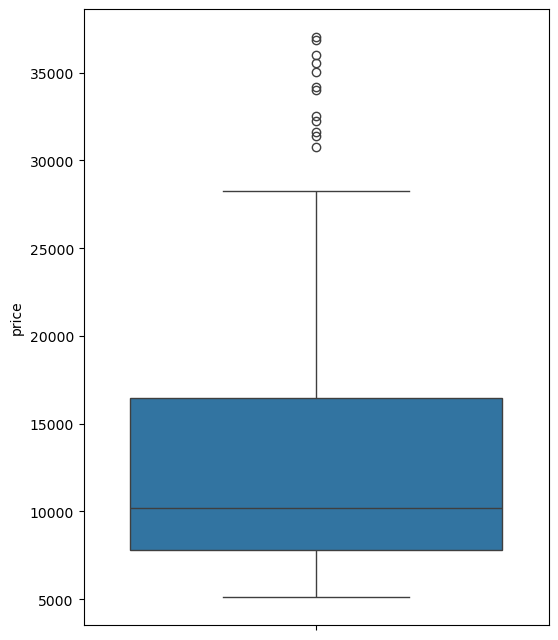

In [45]:
plt.figure(figsize=(6,8))
sns.boxplot(new_cardata['price'])

In [53]:
Q1=car_data['price'].quantile(0.25)
Q3=car_data['price'].quantile(0.75)
IQR = Q3 - Q1
print("Dataset shape after preprocessing:", car_data.shape)

Dataset shape after preprocessing: (205, 26)


In [23]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("upper_limit:",upper_limit)
print("lower_limit:",lower_limit)


upper_limit: 29575.5
lower_limit: -5284.5


In [25]:
new_cardata=car_data.loc[(car_data['price']<upper_limit)&(car_data['price']>lower_limit)]
print("before removing outliners:",len(car_data))
print("after removing outliners:",len(new_cardata))
print("outliners",len(car_data)-len(new_cardata))

before removing outliners: 205
after removing outliners: 190
outliners 15


<Axes: ylabel='price'>

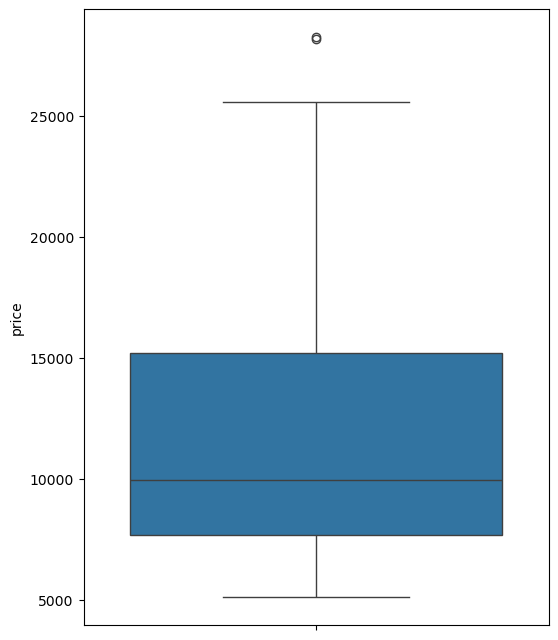

In [27]:
plt.figure(figsize=(6,8))
sns.boxplot(new_cardata['price'])

## SHOWING NUMERICAL AND CATEGORICAL COLUMNS

In [61]:
numerical_columns=car_data.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [59]:
categorical_columns=car_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

### ENCODING (process of convert categorical values into numerical)

In [67]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    car_data[col] = label_encoder.fit_transform(car_data[col])


In [77]:
numerical_columns=car_data.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [79]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,5,2,1,0,1,0,2,0,2,...,18,5,23,4,13,30,10,8,10,118
1,1,5,3,1,0,1,0,2,0,2,...,18,5,23,4,13,30,10,8,10,137
2,2,3,1,1,0,1,2,2,0,10,...,28,5,1,28,13,45,10,6,9,137
3,3,4,4,1,0,0,3,1,0,30,...,11,5,13,25,22,27,16,11,13,123
4,4,4,5,1,0,0,3,0,0,28,...,22,5,13,25,5,33,16,5,5,148


In [69]:
car_data.shape

(205, 26)

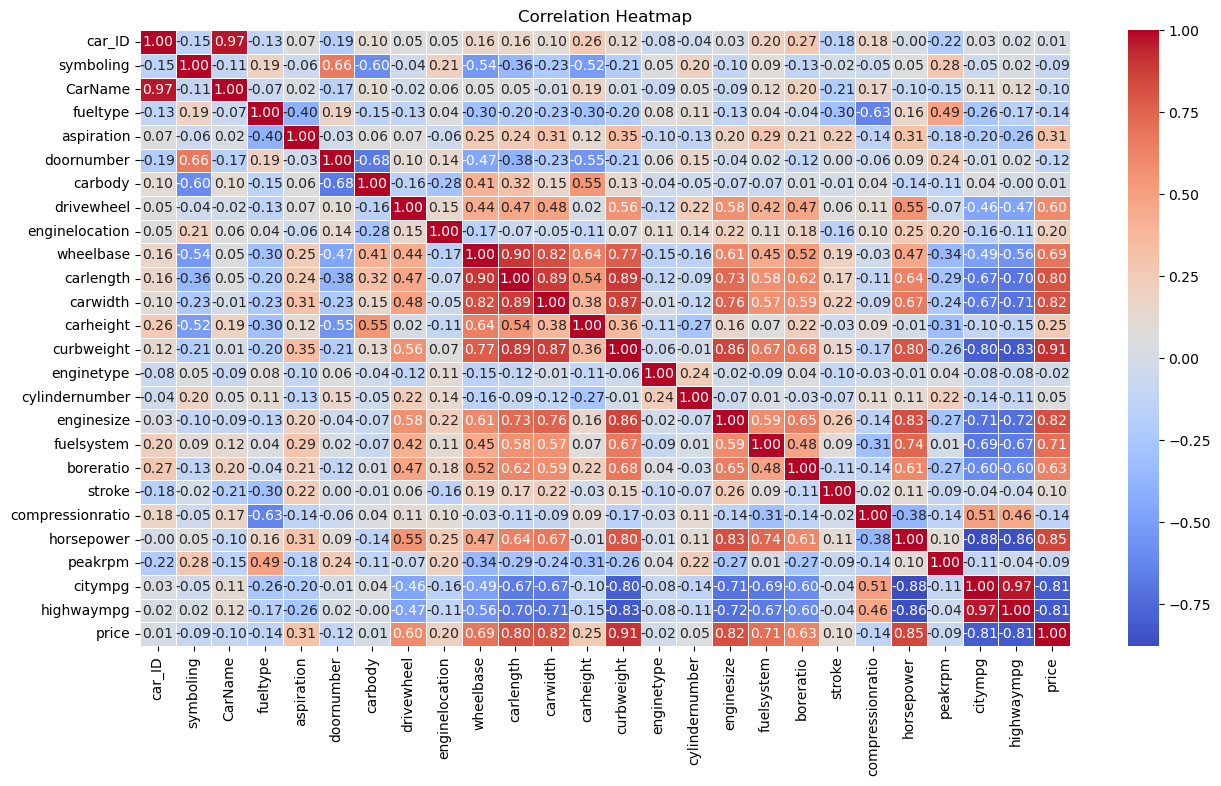

In [81]:
plt.figure(figsize=(15, 8))
correlation_matrix = car_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [71]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   car_ID            205 non-null    int64
 1   symboling         205 non-null    int64
 2   CarName           205 non-null    int64
 3   fueltype          205 non-null    int64
 4   aspiration        205 non-null    int64
 5   doornumber        205 non-null    int64
 6   carbody           205 non-null    int64
 7   drivewheel        205 non-null    int64
 8   enginelocation    205 non-null    int64
 9   wheelbase         205 non-null    int64
 10  carlength         205 non-null    int64
 11  carwidth          205 non-null    int64
 12  carheight         205 non-null    int64
 13  curbweight        205 non-null    int64
 14  enginetype        205 non-null    int64
 15  cylindernumber    205 non-null    int64
 16  enginesize        205 non-null    int64
 17  fuelsystem        205 non-null    i

### FEATURE SELECTION AND PREPROCESSING

In [87]:
# Feature importance using Random Forest
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(car_data.drop('price', axis=1), car_data['price'])
feature_importance = pd.DataFrame({
    'feature': car_data.drop('price', axis=1).columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
             feature  importance
13        curbweight    0.632145
24        highwaympg    0.144865
21        horsepower    0.072740
16        enginesize    0.044943
0             car_ID    0.015888
11          carwidth    0.014657
23           citympg    0.011430
2            CarName    0.011306
9          wheelbase    0.009249
10         carlength    0.008643
19            stroke    0.005339
6            carbody    0.005288
22           peakrpm    0.004674
12         carheight    0.004425
18         boreratio    0.002888
17        fuelsystem    0.002652
20  compressionratio    0.002456
7         drivewheel    0.001735
1          symboling    0.001666
4         aspiration    0.000976
14        enginetype    0.000882
5         doornumber    0.000833
3           fueltype    0.000175
15    cylindernumber    0.000130
8     enginelocation    0.000015


### BULIDING MODELS TO FIND BEST MODEL

In [97]:
print("\nSplitting data...")
X_train, X_test, y_train, y_test = train_test_split(car_data.drop('price', axis=1), car_data['price'], test_size=0.2, random_state=42)


Splitting data...


In [99]:
x_standardized=StandardScaler()
X_train_scaled = x_standardized.fit_transform(X_train)
X_test_scaled = x_standardized.transform(X_test)


In [101]:
print("\nTraining models...")
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'MLP': MLPRegressor(random_state=42, max_iter=1000)
}


Training models...


In [105]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # 12. Model Evaluation
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }


Training Linear Regression...

Training SVR...

Training Random Forest...

Training Gradient Boosting...

Training MLP...


In [107]:
# Print model performance
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Model Performance:

Linear Regression:
MAE: 14.8393
MSE: 322.7142
RMSE: 17.9642
R2: 0.8843

SVR:
MAE: 32.5329
MSE: 1692.7798
RMSE: 41.1434
R2: 0.3932

Random Forest:
MAE: 11.7112
MSE: 226.3493
RMSE: 15.0449
R2: 0.9189

Gradient Boosting:
MAE: 12.6378
MSE: 266.0184
RMSE: 16.3101
R2: 0.9046

MLP:
MAE: 18.4038
MSE: 530.3422
RMSE: 23.0292
R2: 0.8099


In [109]:
# Find best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


In [111]:
# 13. Hyperparameter Tuning
print("\nTuning best model...")
if isinstance(best_model, RandomForestRegressor):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
elif isinstance(best_model, GradientBoostingRegressor):
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
elif isinstance(best_model, MLPRegressor):
    param_grid = {
        'hidden_layer_sizes': [(100,), (100, 50)],
        'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.001, 0.01]
    }
else:
    param_grid = {}


Tuning best model...


In [113]:
if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [115]:
import joblib

# 14. Save the Model
print("\nSaving model...")
joblib.dump(best_model, 'car_data_model.joblib')
print("Model and scaler saved as 'car_data_model.joblib' and 'car_data_scaler.joblib'")


Saving model...
Model and scaler saved as 'car_data_model.joblib' and 'car_data_scaler.joblib'


In [117]:
# 15. Test with Unseen Data
print("\nTesting with unseen data...")
final_predictions = best_model.predict(X_test_scaled)
final_metrics = {
    'MAE': mean_absolute_error(y_test, final_predictions),
    'MSE': mean_squared_error(y_test, final_predictions),
    'RMSE': np.sqrt(mean_squared_error(y_test, final_predictions)),
    'R2': r2_score(y_test, final_predictions)
}


Testing with unseen data...


In [119]:
print("\nFinal Model Performance:")
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Final Model Performance:
MAE: 11.3676
MSE: 216.1969
RMSE: 14.7036
R2: 0.9225


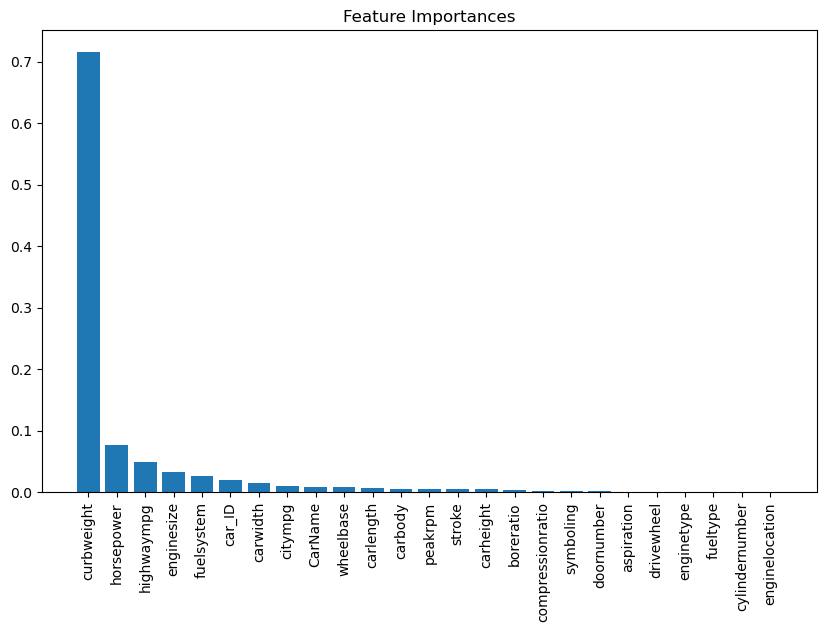

In [135]:
# Feature importance for tree-based models


best_tree_model = models['Random Forest']  # Replace with the best-performing tree model
importances = best_tree_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), car_data.columns[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()

## CONCLUSION:

Based on the analysis of the Chinese automobile company dataset, Gradient Boosting emerged as the best-performing model for predicting the target variable, price. Its superior performance, compared to other models, highlights its ability to capture the intricate relationships between features and the target variable within the dataset. This finding underscores the effectiveness of Gradient Boosting in handling complex data structures and delivering accurate predictions. 
